In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score

In [17]:
data=pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [19]:
datacopy=data.copy()
def Encoder(df):
    columnsToEncode=list(datacopy.select_dtypes(include=['category','object']))
    le=LabelEncoder()
    print(f'cols for label encoding :{columnsToEncode}')
    for feature in columnsToEncode:
        try:
            datacopy[feature]=le.fit_transform(datacopy[feature])
        except:
            print('Error encoding'+feature)
    return datacopy
datacopy=Encoder(datacopy)
datacopy
            

cols for label encoding :['sex', 'smoker', 'region']


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Using the Encoder function we basically converted all the categorical data into numerical data.Here Female 0 male 1...
Smoker 0 and Non-smoker 1....Southeast 2,southwest 3,,northwest 1,,northwest 0

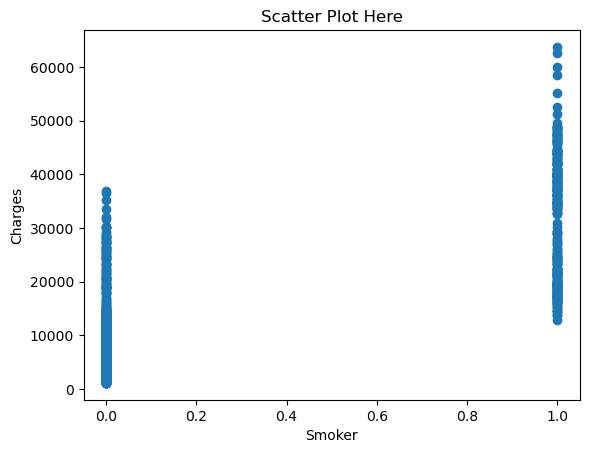

In [33]:
plt.scatter(datacopy['smoker'],datacopy['charges'])# x axis e totalbill jaabe,,,y axis e tip jaabe
plt.title("Scatter Plot Here")
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

We can see that here is that charge gets higher for the people who smokes...0 stands for people who smokes and 1 who does not

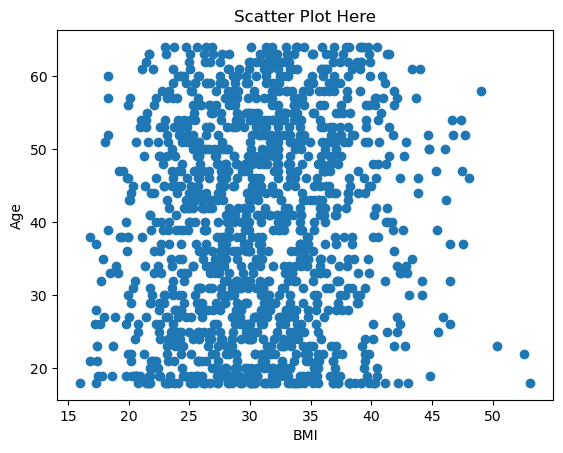

In [43]:
plt.scatter(datacopy['bmi'],datacopy['age'])# x axis e totalbill jaabe,,,y axis e tip jaabe
plt.title("Scatter Plot Here")
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

We can see that here 

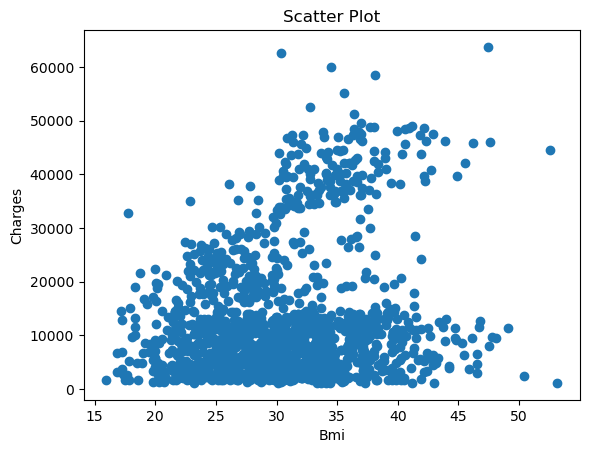

In [21]:
plt.scatter(data['bmi'],data['charges'])# x axis represents bmi and y axis represents charges
plt.title("Scatter Plot")
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.show()

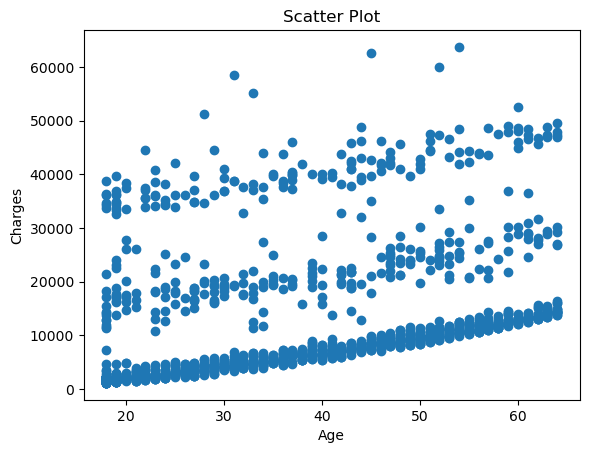

In [22]:
plt.scatter(data['age'],data['charges'])# x axis e totalbill jaabe,,,y axis e tip jaabe
plt.title("Scatter Plot")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Text(0, 0.5, 'Charges')

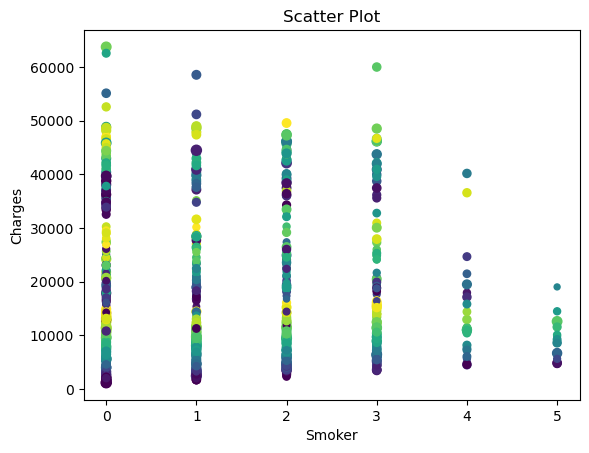

In [24]:
plt.scatter(data['children'],data['charges'],c=data['age'],s=data['bmi']*1) #britter size boro korlam for understanding
            # c means colour,s means size,scatter plot e dot gulo
            #size
plt.title("Scatter Plot")
            
plt.xlabel('Smoker')
plt.ylabel('Charges')


Text(0, 0.5, 'Charges')

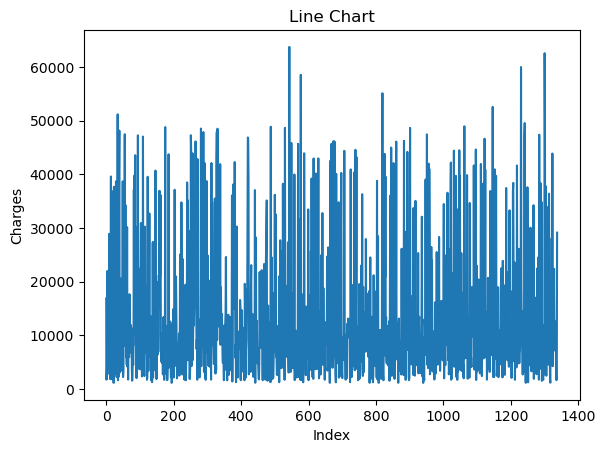

In [25]:
plt.plot(data['charges'])
plt.title("Line Chart")
plt.xlabel('Index')
plt.ylabel('Charges')

Text(0, 0.5, 'Charges')

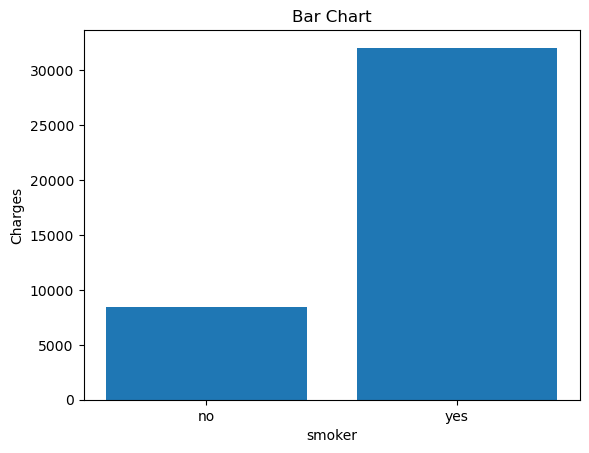

In [26]:
bar_df=data.groupby('smoker').mean().reset_index()
bar_df
plt.bar(bar_df['smoker'],bar_df['charges'])
plt.title('Bar Chart')
plt.xlabel('smoker')
plt.ylabel('Charges')

Text(0, 0.5, 'charges')

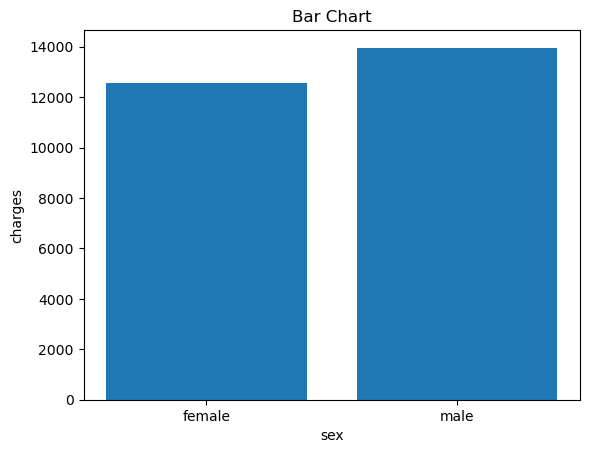

In [27]:
bar_df=data.groupby('sex').mean().reset_index()
bar_df
plt.bar(bar_df['sex'],bar_df['charges'])
plt.title('Bar Chart')
plt.xlabel('sex')
plt.ylabel('charges')

Text(0, 0.5, 'bmi')

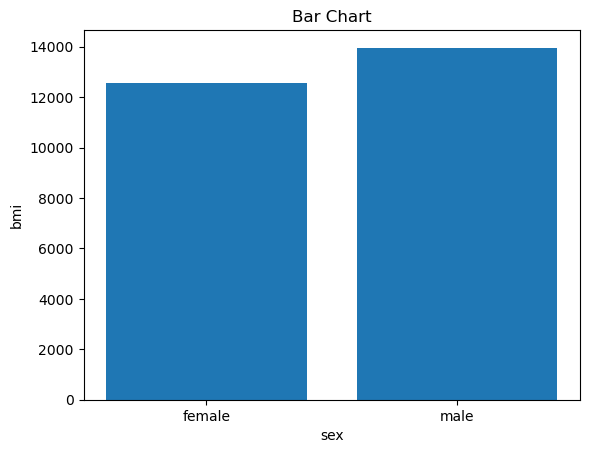

In [28]:
bar_df=data.groupby('sex').mean().reset_index()
bar_df
plt.bar(bar_df['sex'],bar_df['charges'])
plt.title('Bar Chart')
plt.xlabel('sex')
plt.ylabel('bmi')

Text(0, 0.5, 'charges')

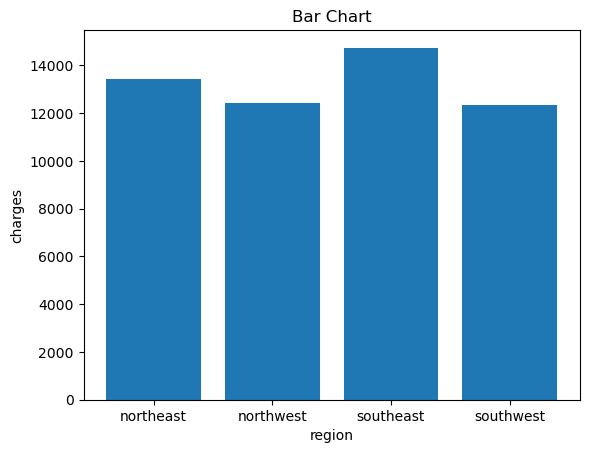

In [29]:
bar_df=data.groupby('region').mean().reset_index()
bar_df
plt.bar(bar_df['region'],bar_df['charges'])
plt.title('Bar Chart')
plt.xlabel('region')
plt.ylabel('charges')

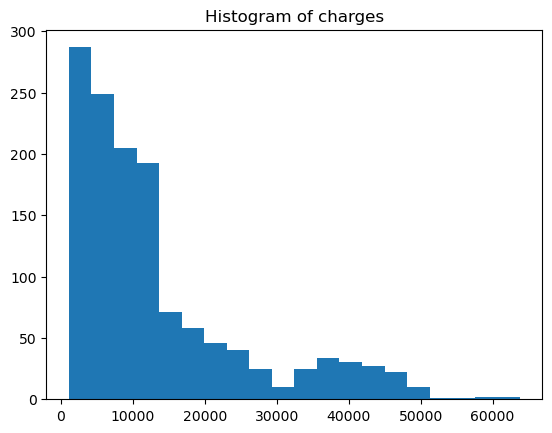

In [30]:
plt.hist(data['charges'],bins=20) #bin means how many interval e graph bhag khobe
plt.title('Histogram of charges')
plt.show()

In [14]:
data['charges'].mean()

13270.422265141257

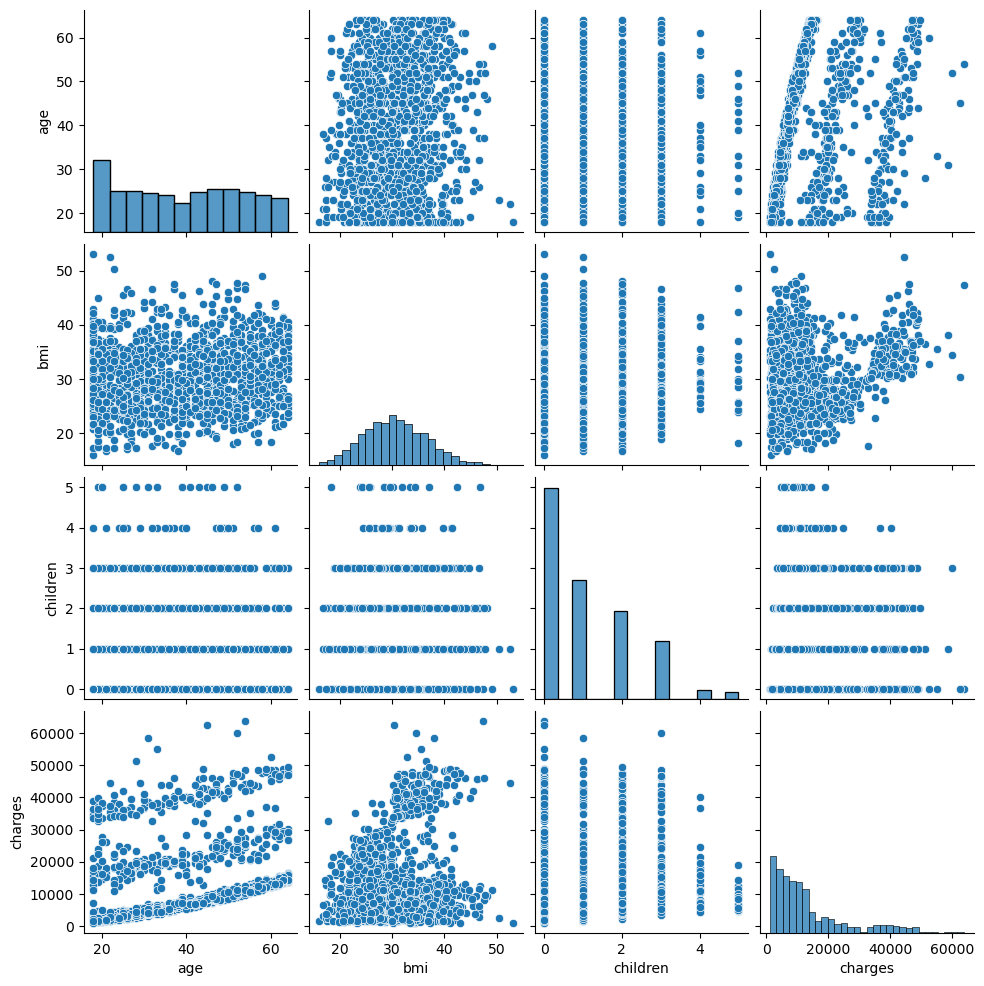

In [15]:
sns.pairplot(data)
plt.show()

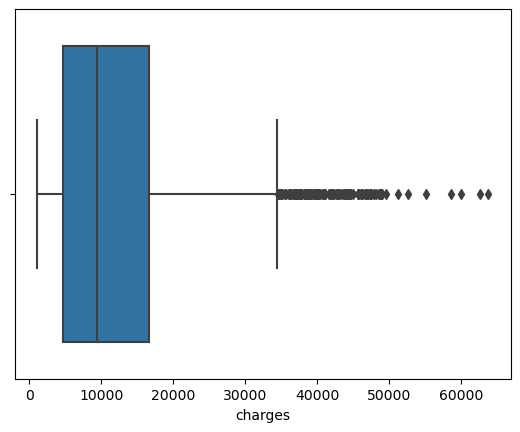

In [16]:
sns.boxplot(x=data['charges'])
plt.show()

In [45]:
#finding the null values
data.isnull().sum()
#so no null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [46]:
import sklearn.preprocessing as preproc

In [47]:
%matplotlib inline

In [52]:
data


,age,sex,bmi,children,smoker,region,charges,minmaxcharge
0,19,female,27.900,0,yes,southwest,16884.92400,0.251611
1,18,male,33.770,1,no,southeast,1725.55230,0.009636
2,28,male,33.000,3,no,southeast,4449.46200,0.053115
3,33,male,22.705,0,no,northwest,21984.47061,0.333010
4,32,male,28.880,0,no,northwest,3866.85520,0.043816
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.151299
1334,18,female,31.920,0,no,northeast,2205.98080,0.017305
1335,18,female,36.850,0,no,southeast,1629.83350,0.008108
1336,21,female,25.800,0,no,southwest,2007.94500,0.014144


In [53]:
data['minmaxcharge'] = preproc.minmax_scale(data[['charges']])
data


,age,sex,bmi,children,smoker,region,charges,minmaxcharge
0,19,female,27.900,0,yes,southwest,16884.92400,0.251611
1,18,male,33.770,1,no,southeast,1725.55230,0.009636
2,28,male,33.000,3,no,southeast,4449.46200,0.053115
3,33,male,22.705,0,no,northwest,21984.47061,0.333010
4,32,male,28.880,0,no,northwest,3866.85520,0.043816
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.151299
1334,18,female,31.920,0,no,northeast,2205.98080,0.017305
1335,18,female,36.850,0,no,southeast,1629.83350,0.008108
1336,21,female,25.800,0,no,southwest,2007.94500,0.014144


In [54]:
X=data.iloc[:,2:3].values
y=data.iloc[:,7:].values
y

array([[0.25161076],
       [0.00963595],
       [0.05311516],
       ...,
       [0.00810808],
       [0.01414352],
       [0.44724873]])

In [55]:
tr_X=X[:10]
tr_y=y[:10]
ts_X=X[:10]
ts_y=y[:10]

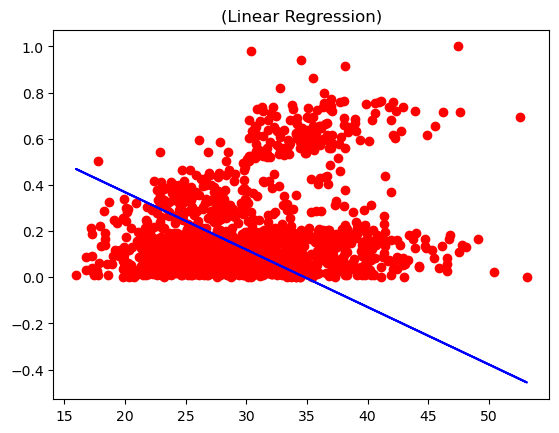

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(tr_X,tr_y) #model train kore nilam
plt.scatter(X,y,color='red')
plt.plot(X ,lin_reg.predict(X),color='blue') #here X is input then lin_reg.predict is output
plt.title('(Linear Regression)')
plt.xlabel=('Age')
plt.ylabel=('BMI')
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(ts_y,lin_reg.predict(ts_X))
r2_score(ts_y,lin_reg.predict(ts_X))  

0.39729186508810066

[[1.00000000e+00 2.79000000e+01 7.78410000e+02 2.17176390e+04]
 [1.00000000e+00 3.37700000e+01 1.14041290e+03 3.85117436e+04]
 [1.00000000e+00 3.30000000e+01 1.08900000e+03 3.59370000e+04]
 [1.00000000e+00 2.27050000e+01 5.15517025e+02 1.17048141e+04]
 [1.00000000e+00 2.88800000e+01 8.34054400e+02 2.40874911e+04]
 [1.00000000e+00 2.57400000e+01 6.62547600e+02 1.70539752e+04]
 [1.00000000e+00 3.34400000e+01 1.11823360e+03 3.73937316e+04]
 [1.00000000e+00 2.77400000e+01 7.69507600e+02 2.13461408e+04]
 [1.00000000e+00 2.98300000e+01 8.89828900e+02 2.65435961e+04]
 [1.00000000e+00 2.58400000e+01 6.67705600e+02 1.72535127e+04]]


TypeError: 'str' object is not callable

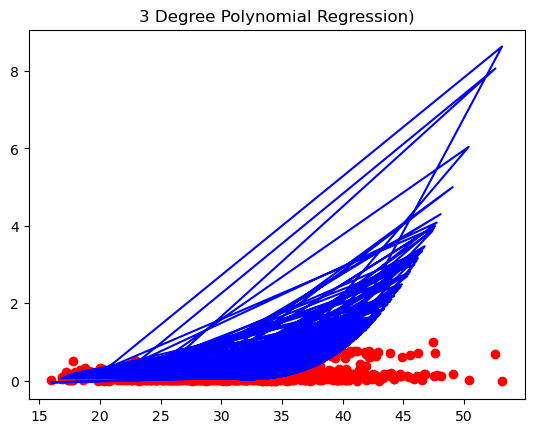

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
i=3
poly_reg=PolynomialFeatures(degree=i) # x to the power 0,1,2,3
X_poly=poly_reg.fit_transform(tr_X)
print(X_poly)
pol_reg=LinearRegression()
pol_reg.fit(X_poly,tr_y)
#Visualizing the Polynomial Regression results
plt.scatter(X,y,color='red')
plt.plot(X,pol_reg.predict(poly_reg.fit_transform(X)),color='blue')
plt.title(f'{i} Degree Polynomial Regression)')
plt.xlabel('Age')
plt.ylabel('Charge')
plt.show()

In [57]:

mean_absolute_error(ts_y,lin_reg.predict(ts_X))
r2_score(ts_y,lin_reg.predict(ts_X))  

0.39729186508810066

deg : 2 MAE:  0.14657326037941806


TypeError: 'str' object is not callable

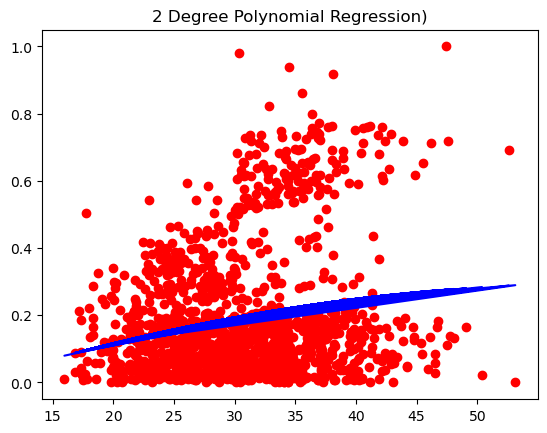

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

for i in range(2, 11):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X)

    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)


    # Visualizing the Polymonial Regression results
    print('deg :', i, 'MAE: ', mean_absolute_error(y, pol_reg.predict(poly_reg.fit_transform(X))))

    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title(f'{i} Degree Polynomial Regression)')
    plt.xlabel('Age')
    plt.ylabel('Charge')
    plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(ts_y,lin_reg.predict(ts_X))
r2_score(ts_y,lin_reg.predict(ts_X))  

In [ ]:
#Here we can see that error has been decreased.